###  Load Data & Preview Bed Info

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("../data//raw/healthcare_analytics_dataset.csv")

# View relevant columns
df[["appointment_date", "bed_id", "bed_ward"]].head()

,appointment_date,bed_id,bed_ward
0,2025-07-06,BID0189,ICU
1,2025-07-16,BID0057,Surgery
2,2025-07-22,BID0012,Surgery
3,2025-07-13,BID0060,ICU
4,2025-08-07,BID0070,General


### Convert Date Column

In [2]:
# Ensure appointment_date is in datetime format
df["appointment_date"] = pd.to_datetime(df["appointment_date"])

# Extract day
df["date"] = df["appointment_date"].dt.date

### Calculate Daily Bed Occupancy

In [3]:
# Group by date and count occupied beds (1 appointment = 1 occupied bed)
bed_occupancy = df.groupby("date")["bed_id"].nunique().reset_index()
bed_occupancy.columns = ["date", "beds_occupied"]

# Preview
bed_occupancy.head()

,date,beds_occupied
0,2025-06-09,1
1,2025-06-10,1
2,2025-06-11,2
3,2025-06-13,4
4,2025-06-14,1


### Set Bed Capacity (Assumption)

Let’s assume the hospital has a fixed bed capacity of 100 beds.

In [4]:
# Assume fixed total beds
TOTAL_BEDS = 100

# Calculate occupancy rate
bed_occupancy["occupancy_rate"] = bed_occupancy["beds_occupied"] / TOTAL_BEDS

### Plot Bed Occupancy Rate Over Time

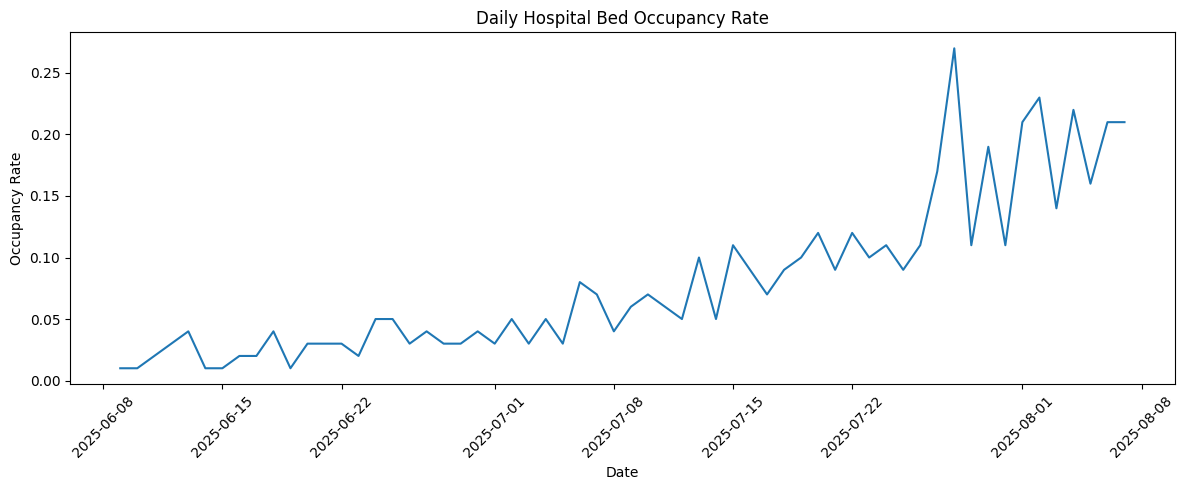

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Save folder
os.makedirs("../visuals/plots", exist_ok=True)

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=bed_occupancy, x="date", y="occupancy_rate")
plt.title("Daily Hospital Bed Occupancy Rate")
plt.ylabel("Occupancy Rate")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()

# Save
plt.savefig("../visuals/plots/bed_occupancy_trend.png")
plt.show()

### Highlight Overload Days

In [6]:
# Filter days where occupancy exceeded 90%
overloaded = bed_occupancy[bed_occupancy["occupancy_rate"] > 0.9]

print("🔴 Days with over 90% bed usage:")
print(overloaded[["date", "occupancy_rate"]])

🔴 Days with over 90% bed usage:
Empty DataFrame
Columns: [date, occupancy_rate]
Index: []
